In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv('/content/advertising.csv')

In [27]:
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [28]:
df.shape

(200, 4)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [30]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [31]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

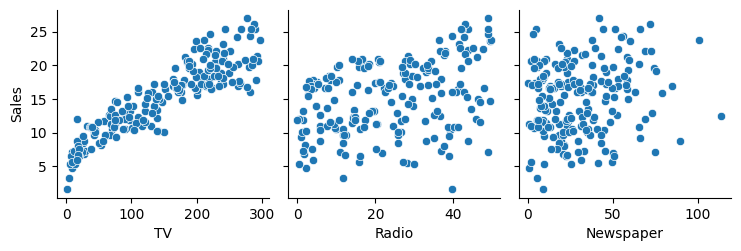

In [32]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')

While adverstising cost increases in Tv sales also increases but in newspaper and radio it is unpredictable.

<Axes: ylabel='Frequency'>

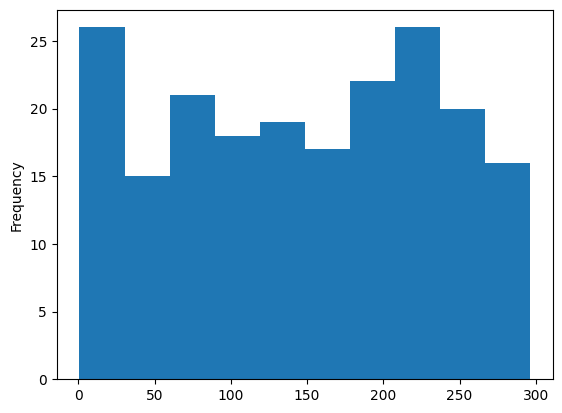

In [33]:
df['TV'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

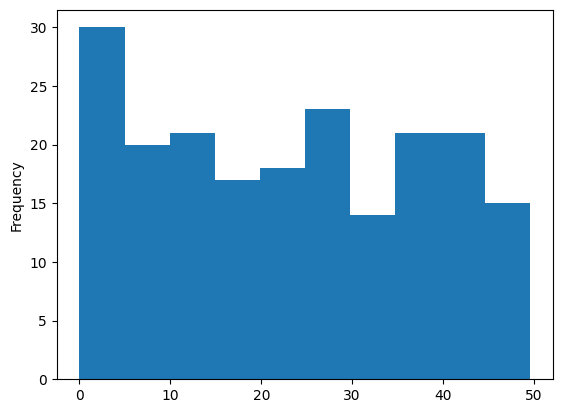

In [34]:
df['Radio'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

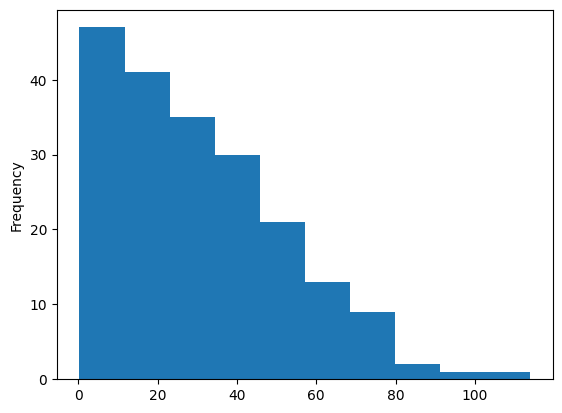

In [35]:
df['Newspaper'].plot.hist(bins=10)

<Axes: >

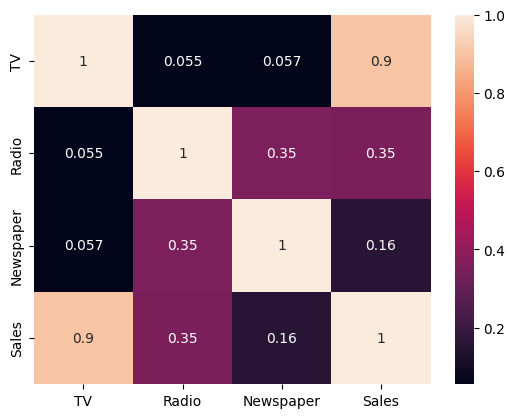

In [36]:
sns.heatmap(df.corr(),annot=True)

sales is highly corellated with TV

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['TV']],df[['Sales']],test_size=0.2,random_state=0)

In [38]:
print(x_train)

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]


In [39]:
x_test

,TV
18,69.2
170,50.0
107,90.4
98,289.7
177,170.2
182,56.2
5,8.7
146,240.1
12,23.8
152,197.6


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [42]:
res=model.predict(x_test)

In [43]:
res

array([[10.92912965],
       [ 9.88399105],
       [12.08313684],
       [22.93189318],
       [16.42699412],
       [10.22148373],
       [ 7.63585439],
       [20.23195181],
       [ 8.45781235],
       [17.91849399],
       [21.38595901],
       [11.90894708],
       [15.68668762],
       [17.38503783],
       [11.32105662],
       [13.70527904],
       [21.62002651],
       [ 7.20037998],
       [11.22851831],
       [18.77855596],
       [22.81758114],
       [14.7994085 ],
       [16.6937222 ],
       [14.33127351],
       [10.07451111],
       [13.86313851],
       [16.17659633],
       [18.32130782],
       [19.35555956],
       [ 8.52857694],
       [10.85292163],
       [17.98925858],
       [22.44198446],
       [20.3190467 ],
       [ 7.88080875],
       [ 8.18019741],
       [10.40656035],
       [17.00399772],
       [10.88558221],
       [ 8.52313351]])

In [44]:
model.coef_

array([[0.0544343]])

In [45]:
model.intercept_

array([7.16227597])

In [46]:
#y=mx+c
0.0544343*69.3+7.16227597

10.934572959999999

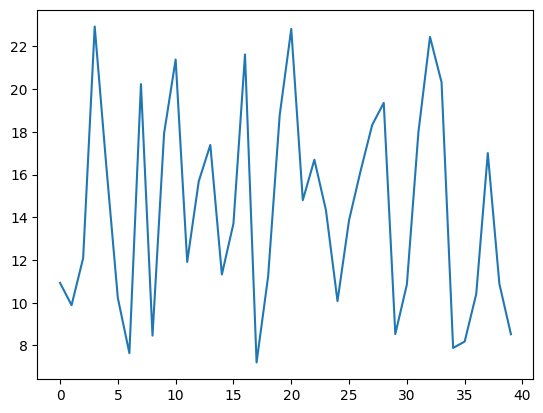

In [47]:
plt.plot(res)

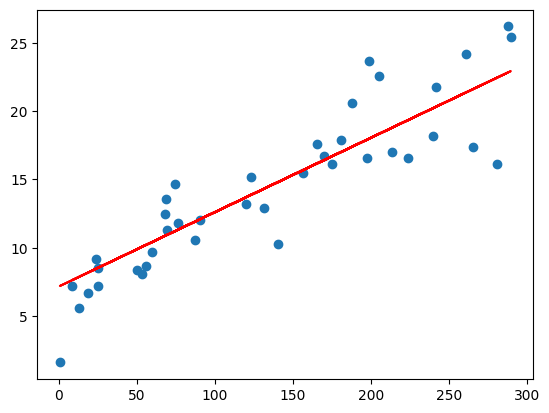

In [48]:
plt.scatter(x_test,y_test)
plt.plot(x_test,7.16227597+0.0544343*x_test,'r')

In [48]:
#Concluding that the above model is able to predicting the sales using advertising platform dataset